# Capstone Project - The Battle of Neighborhoods (Week 2)

 **Note : GitHub repositories doesn't allow to show maps. If you want to see this notebook correctly, please use the link below:** [https://nbviewer.jupyter.org/github/Preciousring/Coursera_Capstone/blob/main/Capstone_Project%20_The%20Battle_of_Neighborhoods%28Week%202%29.ipynb](https://nbviewer.jupyter.org/github/Preciousring/Coursera_Capstone/blob/main/Capstone_Project%20_The%20Battle_of_Neighborhoods%28Week%202%29.ipynb)

## Introduction
Many people are starting to go vegan for a variety of reasons, whether it's to be healthier,
environmental issues or to embrace the cause of animals.This resulted, at first,
in the rise of plant products in supermarkets and then many vegan restaurants were born.

Despite the increasing number of people being attracted to the vegan diet
([5% of French people are vegetarians or vegans and 30% are flexitarians](https://www.vegactu.com/actualite/combien-de-vegetariens-et-de-vegans-en-france-25932/))
, few restaurants in France have been created to satisfy this new clientele.

This project aims to find the best possible location for an investor wishing to open a vegan
restaurant in the city of Nantes in France. Because despite being a niche sector, 
it is possible to make good profits if you have carefully studied the market 
and understood all the lifestyle behind the word _vegan_. Because the vegan diet is 
not only for vegans, it is also for the curious but also for those who use social networks,
in fact the _vegan diet_ is very popular on _Instagram_ especially through many celebrities
(Ariana Grande, Beyoncé) who praise its merits. It will also be important to make 
future customers of the restaurant feel that they are going to enter in a healty atmosphere, 
by being close to healthy shops such as an organic grocery store for example.

This project will therefore aim to answer the question: "Where should an investor open a vegan restaurant in Nantes?" 

## Data
In order to be able to answer the above question, data on Nantes will be required, 
such as the longitude and latitude of each of its neighborhoods, 
its different restaurants and healthy places such as a yoga center.


## Methodology
- The data on the geographical coordinates will be collected on [data.gouv.fr](https://www.data.gouv.fr/fr/datasets/quartiers-des-communes-de-nantes-metropole/) 
- Foursquare will be used to have the location of the different establishments that interest us 
- All the data will then be cleaned before grouping them in a dataframe.
- Finally, several python libraries will be used for datavizualization.

### Download of all the dependencies that we need

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import folium # plotting library

from bs4 import BeautifulSoup
from IPython.display import display_html
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import geopandas as gpd

print('Libraries imported.')

Libraries imported.


### Scraping the Wikipedia page for the list of boroughs of Nantes Metropolis

In [2]:
# Download data and parse it:
request = requests.get('https://fr.wikipedia.org/wiki/Nantes_M%C3%A9tropole')
soup = BeautifulSoup(request.text, 'html.parser')
# First remove Falsey values
table_soup = soup.find_all('table')
filtered_table_soup = [table for table in table_soup if table.caption is not None]

required_table = None

for table in filtered_table_soup:
    if str(table.caption.string).strip() == 'Liste des communes de l’intercommunalité':
        required_table = table
        break
# Then display the table
table_str =  str(table)
display_html(table_str, raw=True)

Nom,Code Insee,Gentilé,Superficie (km2),Population (dernière pop. légale),Densité (hab./km2)
Nantes(siège),44109,Nantais,"65,19",‍314 138 (2018),4 819
Basse-Goulaine,44009,Goulainais,"13,74",‍9 093 (2018),662
Bouaye,44018,Boscéens,"13,83",‍7 914 (2018),572
Bouguenais,44020,Bouguenaisiens,"31,5",‍19 658 (2018),624
Brains,44024,Brennois,"15,31",‍2 836 (2018),185
Carquefou,44026,Carquefoliens,"43,42",‍20 032 (2018),461
La Chapelle-sur-Erdre,44035,Chapelains,"33,42",‍19 526 (2018),584
Couëron,44047,Coueronnais,"44,03",‍21 862 (2018),497
Indre,44074,Indrais,"4,72",‍4 037 (2018),855
Mauves-sur-Loire,44094,Malviens,"14,75",‍3 230 (2018),219


## Data Preparation

In [3]:
# The HTML table is converted to a Pandas DataFrame
df_init = pd.read_html(table_str, flavor= 'html5lib')
df = df_init[0]
df.head()

,Nom,Code Insee,Gentilé,Superficie (km2),Population (dernière pop. légale),Densité (hab./km2)
0,Nantes(siège),44109,Nantais,6519,314 138 (2018),4 819
1,Basse-Goulaine,44009,Goulainais,1374,9 093 (2018),662
2,Bouaye,44018,Boscéens,1383,7 914 (2018),572
3,Bouguenais,44020,Bouguenaisiens,315,19 658 (2018),624
4,Brains,44024,Brennois,1531,2 836 (2018),185


## Data Cleaning

In [4]:
# We will drop the columns that we don't want to keep :
columns_to_keep = ['Nom', 'Code Insee']
df1 = df.reindex(columns=columns_to_keep)
# df1.head()

#We rename 'Nantes(siège)' to 'Nantes'
df1 = df1.replace(['Nantes(siège)'], 'Nantes')

# We will only keep the boroughs that are adjacent to the center of Nantes : 
boroughs_to_keep = ['Nantes', 'Saint-Herblain', 'Rezé']
df2 = df1[df1['Nom'].isin(boroughs_to_keep)]
df2

,Nom,Code Insee
0,Nantes,44109
13,Rezé,44143
15,Saint-Herblain,44162


### Importing the geojson file containing the Latitudes and Longitudes for neighbourhoods in Nantes Metropolis

In [5]:
geo = gpd.read_file('data/geo-Nantes.geojson')

#We rename 'St-Herblain' to 'Saint-Herblain'
geo = geo.replace(['St-Herblain'], 'Saint-Herblain')

#We keep only also in this dataframe the boroughs that we want
geo = geo[geo['libcom'].isin(boroughs_to_keep)]

# We will drop the columns that we don't want to keep :
columns_to_keep2 = ['nom', 'libcom', 'geometry']
geo = geo.reindex(columns=columns_to_keep2)

geo.head()

,nom,libcom,geometry
0,La Houssais,Rezé,"POLYGON ((-1.56017 47.16717, -1.56012 47.16745..."
1,Ragon,Rezé,"POLYGON ((-1.54775 47.14881, -1.54781 47.14890..."
2,Dervallières - Zola,Nantes,"POLYGON ((-1.57102 47.20608, -1.57244 47.20712..."
3,Malakoff - Saint-Donatien,Nantes,"POLYGON ((-1.53871 47.21124, -1.53871 47.21124..."
4,Pont Rousseau,Rezé,"POLYGON ((-1.55336 47.18541, -1.55347 47.18549..."


### Merge the two DataFrames

In [6]:
# We rename a colum in our df2 in order to have the columns having the same name in order to join them
df3 = df2.rename(columns={'Nom': 'libcom'})
df_geo = pd.merge(df3, geo, on='libcom')
df_geo.head()

,libcom,Code Insee,nom,geometry
0,Nantes,44109,Dervallières - Zola,"POLYGON ((-1.57102 47.20608, -1.57244 47.20712..."
1,Nantes,44109,Malakoff - Saint-Donatien,"POLYGON ((-1.53871 47.21124, -1.53871 47.21124..."
2,Nantes,44109,Nantes Nord,"POLYGON ((-1.57686 47.25480, -1.57692 47.25487..."
3,Nantes,44109,Doulon - Bottière,"POLYGON ((-1.51491 47.21645, -1.51545 47.21767..."
4,Nantes,44109,Nantes Sud,"POLYGON ((-1.51813 47.18059, -1.51813 47.18059..."


In [7]:
#  We will convert the geometries into Lambert_Conformal_Conic_2SP (EPSG: 2154) in order to flat up the map of France (where the city of Nantes is located) 
df_geo = df_geo.set_geometry('geometry', crs=2154)

#Find the center point
df_geo['Center_point'] = df_geo['geometry'].centroid

#Extract lat and lon from the centerpoint
df_geo["lat"] = df_geo.Center_point.map(lambda p: p.y)
df_geo["lon"] = df_geo.Center_point.map(lambda p: p.x)
df_geo.head()

,libcom,Code Insee,nom,geometry,Center_point,lat,lon
0,Nantes,44109,Dervallières - Zola,"POLYGON ((-1.57102 47.20608, -1.57244 47.20712...",POINT (-1.58934 47.21624),47.216244,-1.589340
1,Nantes,44109,Malakoff - Saint-Donatien,"POLYGON ((-1.53871 47.21124, -1.53871 47.21124...",POINT (-1.53563 47.22282),47.222819,-1.535631
2,Nantes,44109,Nantes Nord,"POLYGON ((-1.57686 47.25480, -1.57692 47.25487...",POINT (-1.56547 47.25750),47.257496,-1.565468
3,Nantes,44109,Doulon - Bottière,"POLYGON ((-1.51491 47.21645, -1.51545 47.21767...",POINT (-1.50656 47.23706),47.237059,-1.506559
4,Nantes,44109,Nantes Sud,"POLYGON ((-1.51813 47.18059, -1.51813 47.18059...",POINT (-1.53047 47.19162),47.191625,-1.530468


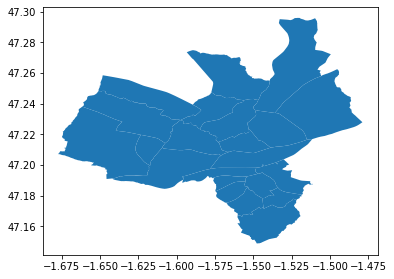

In [8]:
# Plot from the dataset
df_geo.plot(figsize=(6, 6))
plt.show()

### Create a map with markers showing the name each borough and neigbourhood

In [9]:
map_nantes = folium.Map(location=[47.30, -1.475], zoom_start=11, tiles='CartoDB positron')

# add markers to map
for _, r in df_geo.iterrows():
    label = '{}, {}'.format(r['nom'], r['libcom'])
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
#     folium.Popup(label).add_to(geo_j)
    folium.Marker(
        location=[r['lat'], r['lon']],
        popup=label).add_to(geo_j)  
    geo_j.add_to(map_nantes)

# map_nantes.save('map_nantes.html')

display(map_nantes)

In [10]:
# Some neighbourhoods are too far away from the center of Nantes, we will drop these rown in the dataframe
neighbourhoods_to_drop = ['Bourg', 'Ragon', 'Blordière', 'La Houssais', 'Château de Rezé', 'Nord', 'Nantes Nord', 'Nantes Erdre', 'Doulon']
df_geo2 = df_geo[~df_geo.nom.isin(neighbourhoods_to_drop)]
df_geo_final = df_geo2.drop(['Code Insee', 'geometry', 'Center_point'], axis = 1)
df_geo_final = df_geo_final.rename(columns = {'libcom':'Borough','nom':'Neighbourhood', 'lat':'Latitude', 'lon':'Longitude'})
df_geo_final.head()

,Borough,Neighbourhood,Latitude,Longitude
0,Nantes,Dervallières - Zola,47.216244,-1.589340
1,Nantes,Malakoff - Saint-Donatien,47.222819,-1.535631
3,Nantes,Doulon - Bottière,47.237059,-1.506559
4,Nantes,Nantes Sud,47.191625,-1.530468
5,Nantes,Breil - Barberie,47.236107,-1.577037


In [11]:
# create map of Nantes using latitude and longitude values
map_nantes_final = folium.Map(location=[47.30, -1.475], zoom_start=11)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df_geo_final['Latitude'], df_geo_final['Longitude'], df_geo_final['Borough'], df_geo_final['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nantes_final)  
    
map_nantes_final

### Define Foursquare Credentials and Version

In [12]:
CLIENT_ID = '-' # Foursquare ID
CLIENT_SECRET = '-' # Foursquare Secret
VERSION = '20210608' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value


In [13]:
# We use the Foursquare API in order to have the venues in which we are interested (https://developer.foursquare.com/docs/build-with-foursquare/categories/)
vegan_restaurant = '4bf58dd8d48988d1d3941735'
park = '4bf58dd8d48988d163941735'
gym_center ='4bf58dd8d48988d175941735'
organic_shop = '52f2ab2ebcbc57f1066b8b45'
botanical_garden = '52e81612bcbc57f1066b7a22'
garden = '4bf58dd8d48988d15a941735'
foursquare_categories = ",".join([vegan_restaurant, park, gym_center, organic_shop, botanical_garden, garden])
print(foursquare_categories)


4bf58dd8d48988d1d3941735,4bf58dd8d48988d163941735,4bf58dd8d48988d175941735,52f2ab2ebcbc57f1066b8b45,52e81612bcbc57f1066b7a22,4bf58dd8d48988d15a941735


### Explore Neighborhoods in Nantes

In [14]:
# Function to repeat the same process to all the neighborhoods in Nantes Metropolis
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            foursquare_categories,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
# Now the code to run the above function on each neighborhood
nantes_venues = getNearbyVenues(names=df_geo_final['Neighbourhood'],
                                   latitudes=df_geo_final['Latitude'],
                                   longitudes=df_geo_final['Longitude']
                                  )

Dervallières - Zola
Malakoff - Saint-Donatien
Doulon - Bottière
Nantes Sud
Breil - Barberie
Ile de Nantes
Bellevue - Chantenay - Sainte Anne
Hauts Pavés - Saint Félix
Centre Ville
Pont Rousseau
Hôtel de Ville
Trentemoult
Centre
Est


In [16]:
# Check the size of the resulting dataframe
print(nantes_venues.shape)
nantes_venues.head()

(32, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Malakoff - Saint-Donatien,47.222819,-1.535631,Chauffage Nantais,47.222090,-1.531125,Garden
1,Malakoff - Saint-Donatien,47.222819,-1.535631,Parc de la Moutonnerie,47.219616,-1.533185,Park
2,Malakoff - Saint-Donatien,47.222819,-1.535631,Le Temple Du Fitness,47.219785,-1.532907,Gym
3,Nantes Sud,47.191625,-1.530468,Parc de la Crapaudine,47.189168,-1.533320,Park
4,Nantes Sud,47.191625,-1.530468,Bords de Sèvre nantaise,47.189084,-1.534639,Park


In [17]:
# We want to list the unique categories of venues
venues_list = nantes_venues['Venue Category'].unique()
display(venues_list)

# We drop the venues that are not interesting to us
venues_to_drop = ['Tennis Stadium', 'Supermarket', 'Trade School', 'Home Service']
nantes_venues_final = nantes_venues[~nantes_venues['Venue Category'].isin(venues_to_drop)] 
nantes_venues_final

array(['Garden', 'Park', 'Gym', 'Yoga Studio', 'Tennis Stadium',
       'Gym / Fitness Center', 'Pedestrian Plaza',
       'Vegetarian / Vegan Restaurant', 'Health Food Store',
       'Home Service', 'Trade School', 'Supermarket'], dtype=object)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Malakoff - Saint-Donatien,47.222819,-1.535631,Chauffage Nantais,47.222090,-1.531125,Garden
1,Malakoff - Saint-Donatien,47.222819,-1.535631,Parc de la Moutonnerie,47.219616,-1.533185,Park
2,Malakoff - Saint-Donatien,47.222819,-1.535631,Le Temple Du Fitness,47.219785,-1.532907,Gym
3,Nantes Sud,47.191625,-1.530468,Parc de la Crapaudine,47.189168,-1.533320,Park
4,Nantes Sud,47.191625,-1.530468,Bords de Sèvre nantaise,47.189084,-1.534639,Park
5,Breil - Barberie,47.236107,-1.577037,Square Georges Washington,47.233773,-1.575480,Park
6,Breil - Barberie,47.236107,-1.577037,ASPTT Salle Longchamp,47.235469,-1.579392,Gym
7,Breil - Barberie,47.236107,-1.577037,Jardin des Nectars,47.238088,-1.582203,Park
8,Breil - Barberie,47.236107,-1.577037,Athénée Bien Etre,47.232168,-1.575495,Yoga Studio
9,Ile de Nantes,47.205223,-1.546737,Jardin des Fonderies,47.205913,-1.545194,Garden


In [18]:
# Check how many venues were returned for each neighborhood
nantes_venues_final.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Bellevue - Chantenay - Sainte Anne,1,1,1,1,1,1
Breil - Barberie,4,4,4,4,4,4
Centre,1,1,1,1,1,1
Centre Ville,6,6,6,6,6,6
Est,2,2,2,2,2,2
Hauts Pavés - Saint Félix,1,1,1,1,1,1
Ile de Nantes,4,4,4,4,4,4
Malakoff - Saint-Donatien,3,3,3,3,3,3
Nantes Sud,2,2,2,2,2,2


In [19]:
# one hot encoding
nantes_onehot = pd.get_dummies(nantes_venues_final[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nantes_onehot['Neighbourhood'] = nantes_venues_final['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [nantes_onehot.columns[-1]] + list(nantes_onehot.columns[:-1])
nantes_onehot = nantes_onehot[fixed_columns]

nantes_onehot.head()

,Neighbourhood,Garden,Gym,Gym / Fitness Center,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
0,Malakoff - Saint-Donatien,1,0,0,0,0,0,0,0
1,Malakoff - Saint-Donatien,0,0,0,0,1,0,0,0
2,Malakoff - Saint-Donatien,0,1,0,0,0,0,0,0
3,Nantes Sud,0,0,0,0,1,0,0,0
4,Nantes Sud,0,0,0,0,1,0,0,0


In [20]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
nantes_grouped = nantes_onehot.groupby('Neighbourhood').mean().reset_index()
nantes_grouped

,Neighbourhood,Garden,Gym,Gym / Fitness Center,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
0,Bellevue - Chantenay - Sainte Anne,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00
1,Breil - Barberie,0.000000,0.250000,0.000000,0.000000,0.500000,0.000000,0.000000,0.25
2,Centre,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Centre Ville,0.000000,0.000000,0.000000,0.166667,0.500000,0.166667,0.166667,0.00
4,Est,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00
5,Hauts Pavés - Saint Félix,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00
6,Ile de Nantes,0.250000,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.00
7,Malakoff - Saint-Donatien,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.00
8,Nantes Sud,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00
9,Pont Rousseau,0.333333,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.00


In [21]:
# Print each neighbourhood along with the top 5 most common venues
num_top_venues = 5

for hood in nantes_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = nantes_grouped[nantes_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bellevue - Chantenay - Sainte Anne----
                  venue  freq
0                  Park   1.0
1                Garden   0.0
2                   Gym   0.0
3  Gym / Fitness Center   0.0
4     Health Food Store   0.0


----Breil - Barberie----
                  venue  freq
0                  Park  0.50
1                   Gym  0.25
2           Yoga Studio  0.25
3                Garden  0.00
4  Gym / Fitness Center  0.00


----Centre----
                  venue  freq
0  Gym / Fitness Center   1.0
1                Garden   0.0
2                   Gym   0.0
3     Health Food Store   0.0
4                  Park   0.0


----Centre Ville----
                           venue  freq
0                           Park  0.50
1              Health Food Store  0.17
2               Pedestrian Plaza  0.17
3  Vegetarian / Vegan Restaurant  0.17
4                         Garden  0.00


----Est----
                  venue  freq
0                  Park   1.0
1                Garden   0.0
2           

In [22]:
# Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
# We create the new dataframe and display the top 8 venues for each neighborhood.
num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = nantes_grouped['Neighbourhood']

for ind in np.arange(nantes_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nantes_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Bellevue - Chantenay - Sainte Anne,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
1,Breil - Barberie,Park,Gym,Yoga Studio,Garden,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant
2,Centre,Gym / Fitness Center,Garden,Gym,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
3,Centre Ville,Park,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Garden,Gym,Gym / Fitness Center,Yoga Studio
4,Est,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio


In [24]:
# Set number of clusters
kclusters = 5

nantes_grouped_clustering = nantes_grouped.drop('Neighbourhood', 1)

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nantes_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 1, 3, 0, 0, 2, 2, 0, 4], dtype=int32)

In [25]:
# Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
nantes_merged = df_geo_final

# Merge dataframes in order to add latitude/longitude for each neighborhood
nantes_merged = nantes_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
display(nantes_merged.head())

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Nantes,Dervallières - Zola,47.216244,-1.589340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nantes,Malakoff - Saint-Donatien,47.222819,-1.535631,2.0,Garden,Gym,Park,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
3,Nantes,Doulon - Bottière,47.237059,-1.506559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nantes,Nantes Sud,47.191625,-1.530468,0.0,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
5,Nantes,Breil - Barberie,47.236107,-1.577037,3.0,Park,Gym,Yoga Studio,Garden,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant


In [26]:
# We drop the null values in the dataframe
nantes_merged = nantes_merged[~nantes_merged['Cluster Labels'].isnull()]
nantes_merged['Cluster Labels'] = nantes_merged['Cluster Labels'].astype(int)    
nantes_merged

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
1,Nantes,Malakoff - Saint-Donatien,47.222819,-1.535631,2,Garden,Gym,Park,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
4,Nantes,Nantes Sud,47.191625,-1.530468,0,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
5,Nantes,Breil - Barberie,47.236107,-1.577037,3,Park,Gym,Yoga Studio,Garden,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant
6,Nantes,Ile de Nantes,47.205223,-1.546737,2,Gym,Garden,Gym / Fitness Center,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
7,Nantes,Bellevue - Chantenay - Sainte Anne,47.198141,-1.602449,0,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
9,Nantes,Hauts Pavés - Saint Félix,47.228186,-1.563540,0,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
10,Nantes,Centre Ville,47.213760,-1.556323,3,Park,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Garden,Gym,Gym / Fitness Center,Yoga Studio
13,Rezé,Pont Rousseau,47.186946,-1.545083,4,Gym / Fitness Center,Garden,Gym,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
16,Rezé,Trentemoult,47.194313,-1.571583,1,Gym / Fitness Center,Garden,Gym,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
18,Saint-Herblain,Centre,47.231913,-1.628708,1,Gym / Fitness Center,Garden,Gym,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio


In [27]:
# Create map
map_clusters = folium.Map(location=[47.30, -1.475], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nantes_merged['Latitude'], nantes_merged['Longitude'], nantes_merged['Neighbourhood'], nantes_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [28]:
nantes_merged.loc[nantes_merged['Cluster Labels'] == 0, nantes_merged.columns[[1] + list(range(5, nantes_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
4,Nantes Sud,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
7,Bellevue - Chantenay - Sainte Anne,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
9,Hauts Pavés - Saint Félix,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
20,Est,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio


In [29]:
nantes_merged.loc[nantes_merged['Cluster Labels'] == 1, nantes_merged.columns[[1] + list(range(5, nantes_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
16,Trentemoult,Gym / Fitness Center,Garden,Gym,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
18,Centre,Gym / Fitness Center,Garden,Gym,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio


In [30]:
nantes_merged.loc[nantes_merged['Cluster Labels'] == 2, nantes_merged.columns[[1] + list(range(5, nantes_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
1,Malakoff - Saint-Donatien,Garden,Gym,Park,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
6,Ile de Nantes,Gym,Garden,Gym / Fitness Center,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio


In [31]:
nantes_merged.loc[nantes_merged['Cluster Labels'] == 3, nantes_merged.columns[[1] + list(range(5, nantes_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
5,Breil - Barberie,Park,Gym,Yoga Studio,Garden,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant
10,Centre Ville,Park,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Garden,Gym,Gym / Fitness Center,Yoga Studio


In [32]:
nantes_merged.loc[nantes_merged['Cluster Labels'] == 4, nantes_merged.columns[[1] + list(range(5, nantes_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
13,Pont Rousseau,Gym / Fitness Center,Garden,Gym,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio


In [33]:
# We'll drop the neigbourhoods that are not interesting: Centre-ville because there are already many Vegan restaurants
nantes_merged = nantes_merged[nantes_merged['Neighbourhood'] != 'Centre Ville'] 
nantes_merged

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
1,Nantes,Malakoff - Saint-Donatien,47.222819,-1.535631,2,Garden,Gym,Park,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
4,Nantes,Nantes Sud,47.191625,-1.530468,0,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
5,Nantes,Breil - Barberie,47.236107,-1.577037,3,Park,Gym,Yoga Studio,Garden,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant
6,Nantes,Ile de Nantes,47.205223,-1.546737,2,Gym,Garden,Gym / Fitness Center,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
7,Nantes,Bellevue - Chantenay - Sainte Anne,47.198141,-1.602449,0,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
9,Nantes,Hauts Pavés - Saint Félix,47.228186,-1.563540,0,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
13,Rezé,Pont Rousseau,47.186946,-1.545083,4,Gym / Fitness Center,Garden,Gym,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
16,Rezé,Trentemoult,47.194313,-1.571583,1,Gym / Fitness Center,Garden,Gym,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
18,Saint-Herblain,Centre,47.231913,-1.628708,1,Gym / Fitness Center,Garden,Gym,Health Food Store,Park,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio
20,Saint-Herblain,Est,47.210955,-1.618392,0,Park,Garden,Gym,Gym / Fitness Center,Health Food Store,Pedestrian Plaza,Vegetarian / Vegan Restaurant,Yoga Studio


## Conclusion

The analysis demonstrates that we have nine potential neigbourhoods where it can be interesting to open a vegan restaurant.

However, we could have gone further:
- For example, it could have been interesting to analyze the most visited pedestrian places at lunchtime, because this would allow us to analyze the precise places where there is a high potential for having a large number of customers.
- A second possibility would have been to analyze the rating of the vegan restaurants that are already here in order to choose a neighborhood where there would not be too much competition.